### **Mchine Learning Project**

In [1]:
%pip install ucimlrepo
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [34]:
# IMPORTS
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import imblearn as imb

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from custom_adaboost import *

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Some functions
from utils import *

In [9]:
# Import the dataset into the code

# fetch dataset 
# cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# # data (as pandas dataframes) 
# X = cdc_diabetes_health_indicators.data.features 
# y = cdc_diabetes_health_indicators.data.targets 

# print(X.head())
# print(y.head())
  
# # metadata 
# print(cdc_diabetes_health_indicators.metadata) 

# # variable information 
# print(cdc_diabetes_health_indicators.variables) 

In [3]:
# OR
# READ DATASET
# Run this cell if the dataset exits locally on your machine 
# update your path

dataset_path = "./dataset/diabetes_binary_health_indicators_BRFSS2015.csv"
dataset = pd.read_csv(dataset_path)

# dataset information

# print the columns (features) of the dataset
print(dataset.columns)

''' COLUMNS DESCRIPTIONS:
Diabetes_binary: 0 = non-diabetic, 1 = pre-diabetic or diabetic
HighBP: 0 = no high blood pressure, 1 = high blood pressure
HighChol: 0 = no high cholesterol, 1 = high cholesterol
CholCheck: 0 = no cholesterol check within the last 5 years, 1 = cholesterol check within the last 5 years
BMI: Body Mass Index
Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes
Stroke: (Ever had a stroke) 0 = no stroke, 1 = stroke
HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes	
Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes	
HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes	
AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes	
NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes	
GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor	
MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days	
PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days	
DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes	
Sex: 0 = female 1 = male
Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
'''

# print the first 5 rows of the dataset
dataset.head()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### ***Data Preprocessing and Cleaning:***

In [4]:
# Extract features and target (labels)

features = dataset.drop(columns=['Diabetes_binary'])
print("Features Shape:", features.shape)

labels = dataset['Diabetes_binary']
print("Labels Shape:",labels.shape)


print(features.head())
print(labels.head())

Features Shape: (253680, 21)
Labels Shape: (253680,)
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHl

In [5]:
# print the information about the dataset => number of values in each feature column, number of non-null values, data type and memory usage
print(dataset.info()) # there are ne missing values

# check for duplicates
# returns the number of unique values in each column
dataset.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [6]:
for column in features.columns:
    # convert the values to integers
    # since all the values are integers but stored as float
    # and the processing of integers are much faster so convert them to integers
    if features[column].dtype == 'float64':
        features[column] = features[column].astype(int)
 
    # get unique values for each column in the features
    print(column, ":", features[column].unique())

# convert the labels to integers as well
labels = labels.astype(int)
print("Labels:" ,labels.unique())

HighBP : [1 0]
HighChol : [1 0]
CholCheck : [1 0]
BMI : [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker : [1 0]
Stroke : [0 1]
HeartDiseaseorAttack : [0 1]
PhysActivity : [0 1]
Fruits : [0 1]
Veggies : [1 0]
HvyAlcoholConsump : [0 1]
AnyHealthcare : [1 0]
NoDocbcCost : [0 1]
GenHlth : [5 3 2 4 1]
MentHlth : [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth : [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk : [1 0]
Sex : [0 1]
Age : [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education : [4 6 3 5 2 1]
Income : [3 1 8 6 4 7 2 5]
Labels: [0 1]


### ***Exploratory Data Analysis*** 
#### Analyze your dataset. The goal is to familiarize yourself with the dataset before diving into the upcoming steps. Try to visualize the dataset, build histograms of features or outputs, look at random samples and look for outliers, etc. It is also useful to use a baseline (e.g., ZeroR) to put your results into context.

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

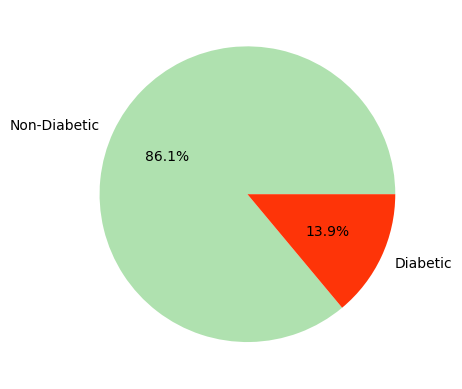

Diabetics Count:  35346
Non-Diabetics Count:  218334


<Axes: xlabel='Diabetes_binary', ylabel='count'>

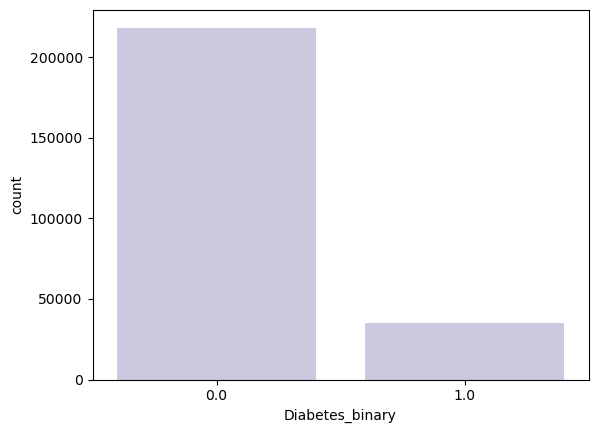

In [7]:
# Data analysis and preprocessind techniques
# 1. Exploratory Data Analysis (EDA)
# 2. Dimensionality Reduction
# 3. Data Mining
# 4. Data Visualization 

############################################ EDA ############################################
# Types of EDA

# For single variable => taking one variable at a time
# 1. Univariate non-graphical.
# 2. Univariate graphical.

# For multiple variables => taking more than one variable at a time
# 3. Multivariate nongraphical.
# 4. Multivariate graphical.

#############################################################################################

# statistics summary of the dataset
# describe the dataset
# print the summary statistics of the dataset (mean, std, min, 25%, 50%, 75%, max)

print(dataset.describe())
# ANALYSIS #
# From the summary statistics we can see that:
# 1.  Most of the rows are classified as non-diabetic (mean is closer to 0) => dataset may not be balanced
# 2   HighBP and HighChol have a mean close to 0.5, which can mean that they are not a very good indicator of diabetes since there are almost equal number of people with and without high blood pressure and high cholesterol but the classification is not balanced
# 3.  The CholCheck has a mean very close to 1 and a small std => most people have had a cholesterol check within the last 5 years
# 4.  BMI mean indicates a slightly overweight population    
# 4.  Somekrs have a mean close to 0.5 => almost equal number of smokers and non-smokers
# 5.  Stroke and HeartDiseaseorAttack have a mean close to 0 => most people have not had a stroke or heart disease/attack (but the two could be related) and the mean is close to the diabetes classification mean
# 6.  High mean for PhysActivity and high std
# 8.  Most people have any kind of health care coverage => good indicator of no diabetes 
# 9.  Very little prople cannot afford to see a doctor
# 10. Mean of GenHlth is close to 2.5 => which is in the middle of the scale (good/very good)
# 11. Very low number of days mean for MentHlth and PhysHlth => most people have good mental and physical health (but the std is relitaively high)
# 12. Most people do not have difficulty walking or climbing stairs
# 13. Dataset is balanced in terms of gender
# 14. Age:
# 15. Most people have a high level of education (mean is high with low std) 5 => College 1 year to 3 years STD: 4 => High school graduate 6 => College graduate 
# 16. Income mean = 6 => Less than $50,000 ($35,000 to less than $50,000) (low std most people have similar (on the higher side) income)
# 17. Age lies on the older side (mean is 8 => 55-59 years) with a high-ish std => most people are older 

#############################################################################################

# Univariate Analysis => analysis of each variable on its own

# Draw a pie chart to show the distribution of the labels
print("Data Distribution: ")
plt.pie(np.array(labels.value_counts()), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['#AFE1AF','#FE3408'])
plt.show()
print("Diabetics Count: ", labels.value_counts()[1])
print("Non-Diabetics Count: ", labels.value_counts()[0])
sns.countplot(x = 'Diabetes_binary', data = dataset, color = '#CBC3E3', order = dataset['Diabetes_binary'].value_counts().index)

# ANALYSIS #
# The dataset is (significantly) not balanced, there are more non-diabetic people than diabetic people


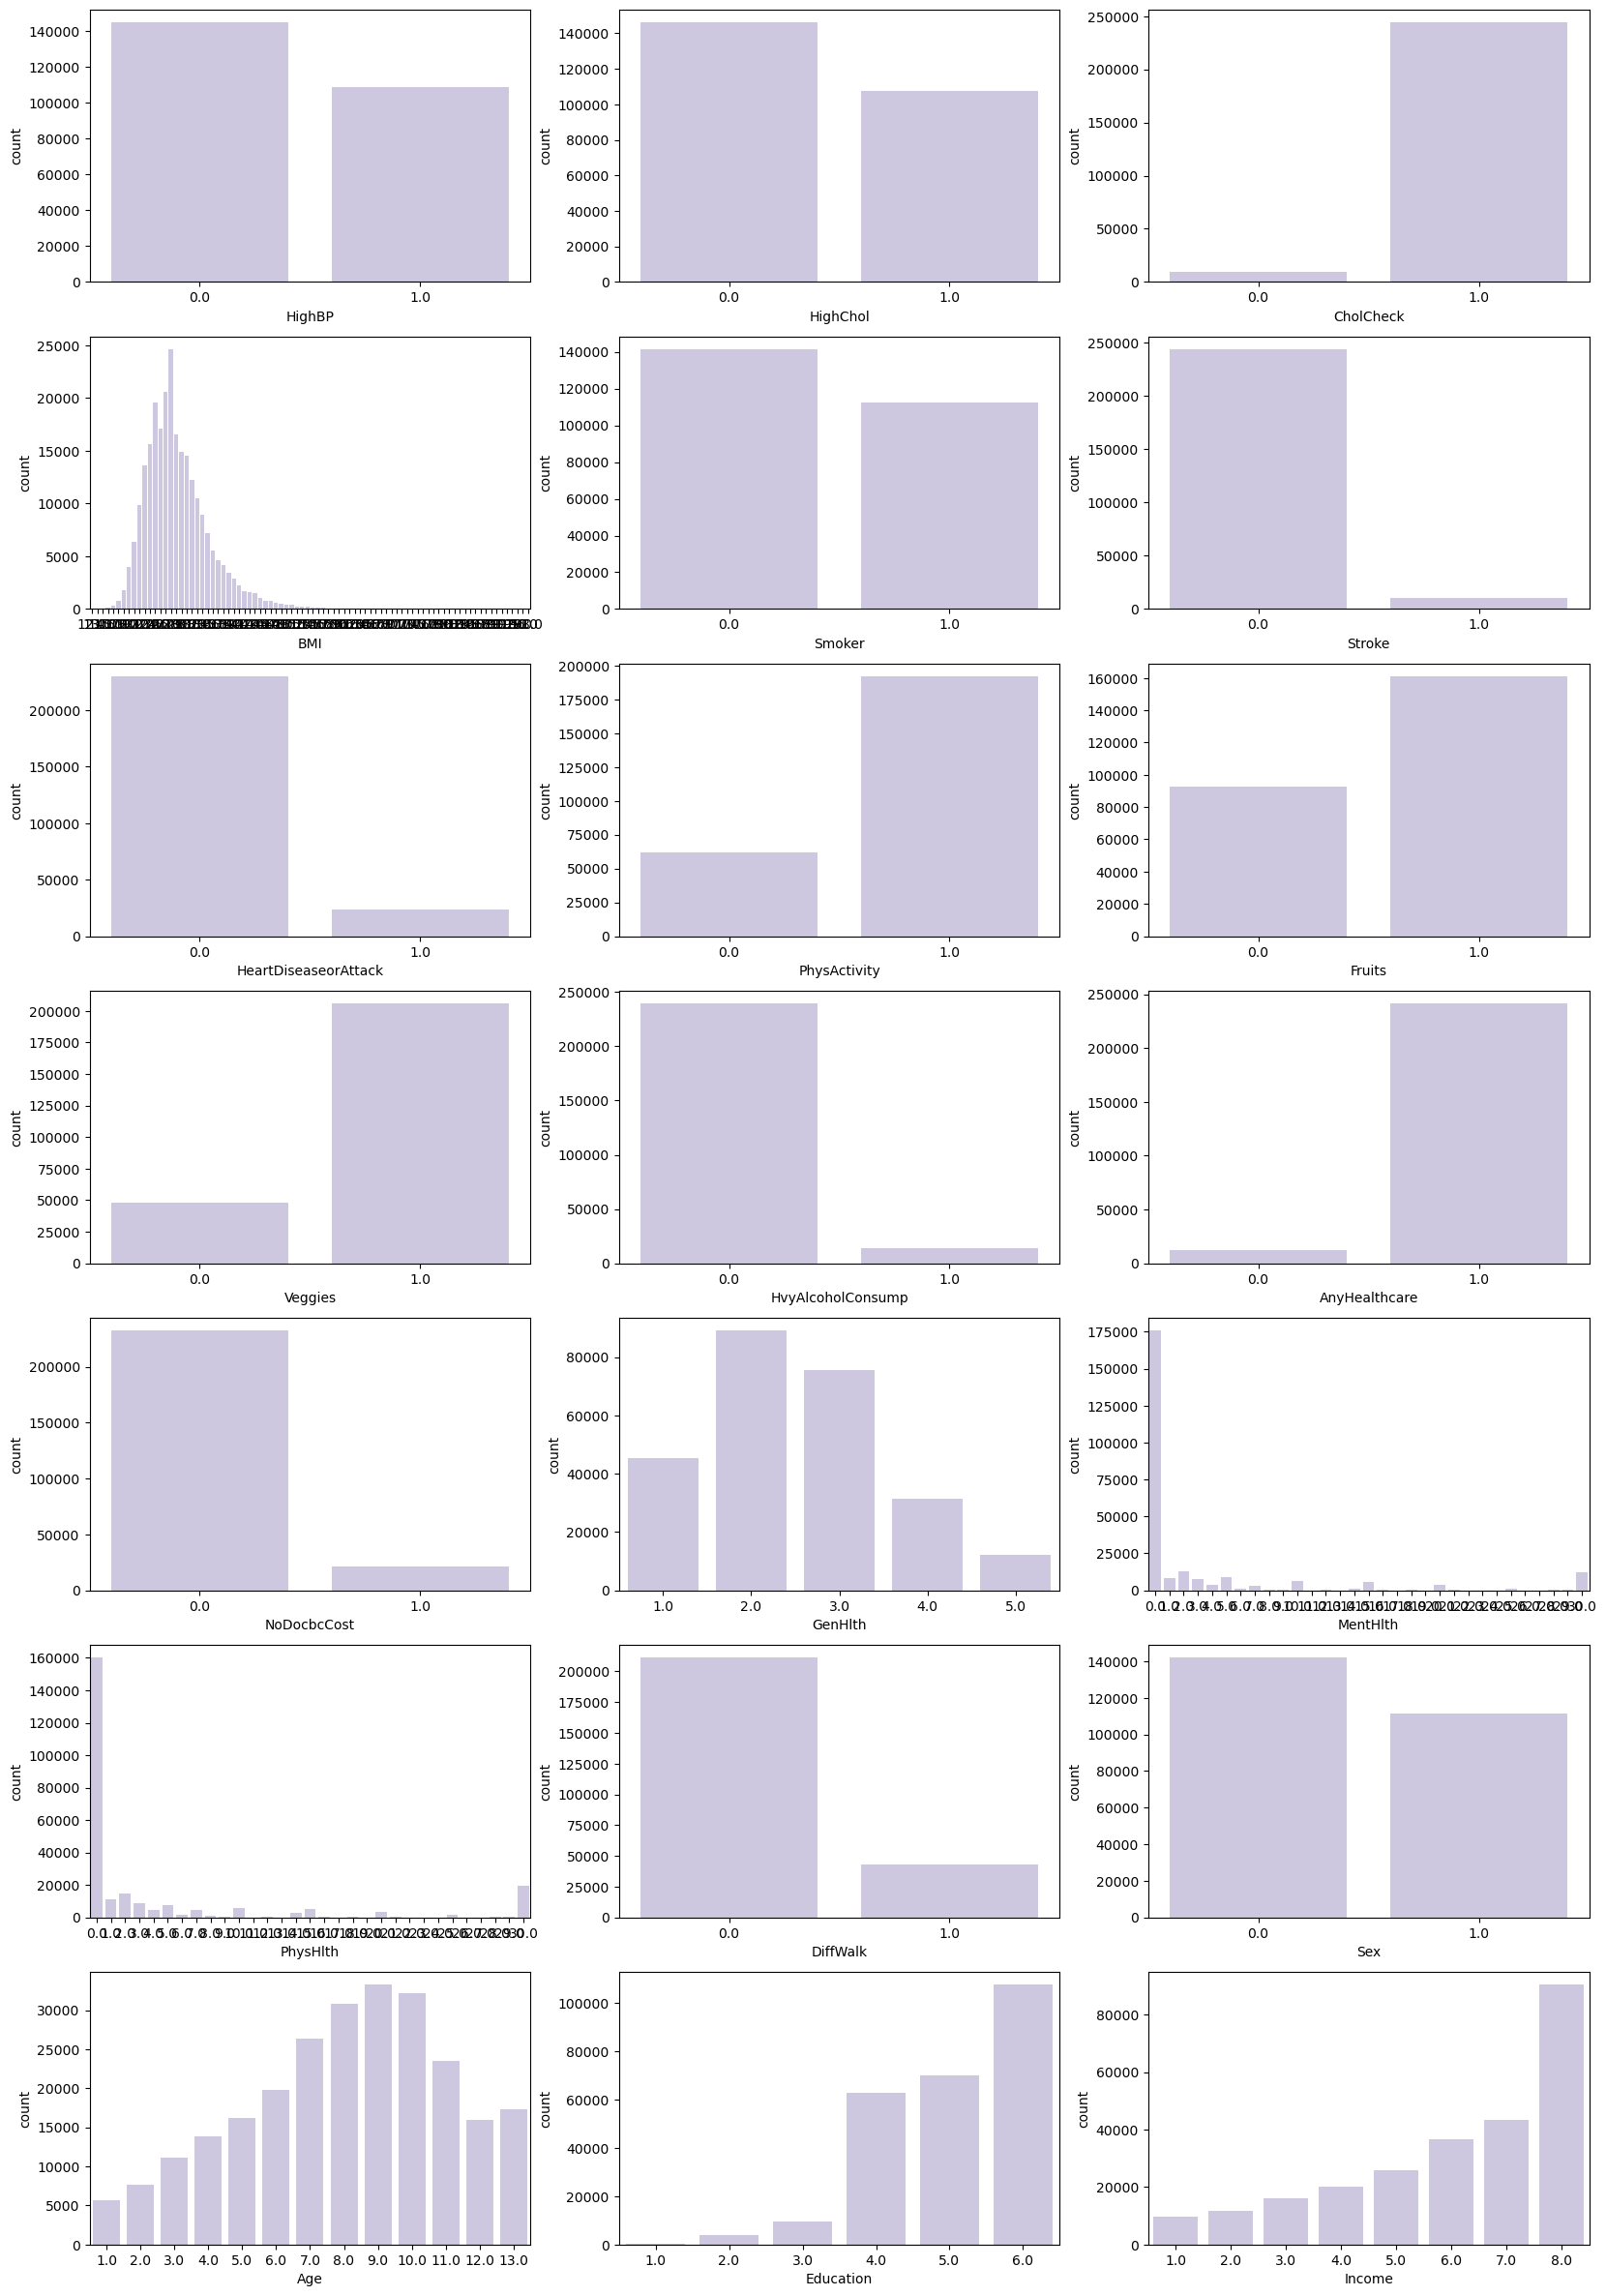

In [8]:
# Draw a count plot for all features independently
fig, axes = plt.subplots(7, 3, figsize = (20, 30))
i = 0
for column in features.columns:
    sns.countplot(x = column, data = dataset, color = '#CBC3E3', ax = axes[i//3, i%3])
    i+=1

# the countplot confirms the analysis from the summary statistics
# Non-binary features distribution:
# BMI is right skewed => mean value greater than the median => max is 98 while mean is 27 => apply log transformation => take care of outliers
# MentHlth and PhysHlth are right skewed => (number of days should we apply log transformation?) TBD => NO, no multiplicative relationship between values
# Income and Education are left skewed => good indication or measure of data and other features in the dataset => should not apply anything

<Axes: xlabel='BMI', ylabel='Density'>

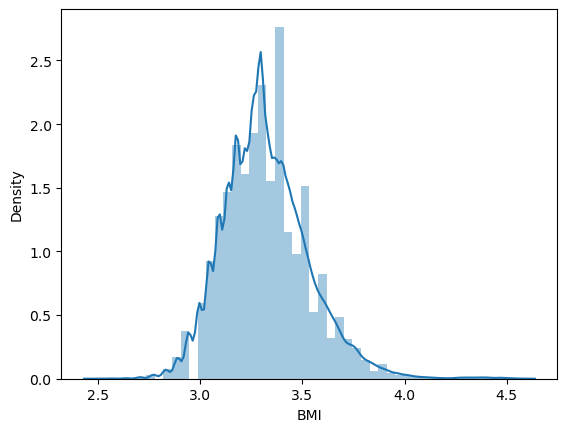

In [9]:
# Applylog transformation to BMI

features_log = features.copy()

features_log['BMI'] = np.log(features['BMI'])

#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(features_log["BMI"], axlabel="BMI")

In [10]:
# Convert the BMI into indices
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [11]:
final_features = features.copy()
final_features['NewBMI'] = NewBMI
final_features.loc[features["BMI"]<18.5, "NewBMI"] = NewBMI[0]
final_features.loc[(features["BMI"]>18.5) & features["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
final_features.loc[(features["BMI"]>24.9) & features["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
final_features.loc[(features["BMI"]>29.9) & features["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
final_features.loc[(features["BMI"]>34.9) & features["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
final_features.loc[features["BMI"]>39.9, "NewBMI"] = NewBMI[5]

final_features["NewBMI"] = final_features["NewBMI"].cat.codes

final_features.drop(columns = ["BMI"], inplace = True)

final_features.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NewBMI
0,1,1,1,1,0,0,0,0,1,0,...,0,5,18,15,1,0,9,4,3,3
1,0,0,0,1,0,0,1,0,0,0,...,1,3,0,0,0,0,7,6,1,2
2,1,1,1,0,0,0,0,1,0,0,...,1,5,30,30,1,0,9,4,8,2
3,1,0,1,0,0,0,1,1,1,0,...,0,2,0,0,0,0,11,3,6,2
4,1,1,1,0,0,0,1,1,1,0,...,0,2,3,0,0,0,11,5,4,2


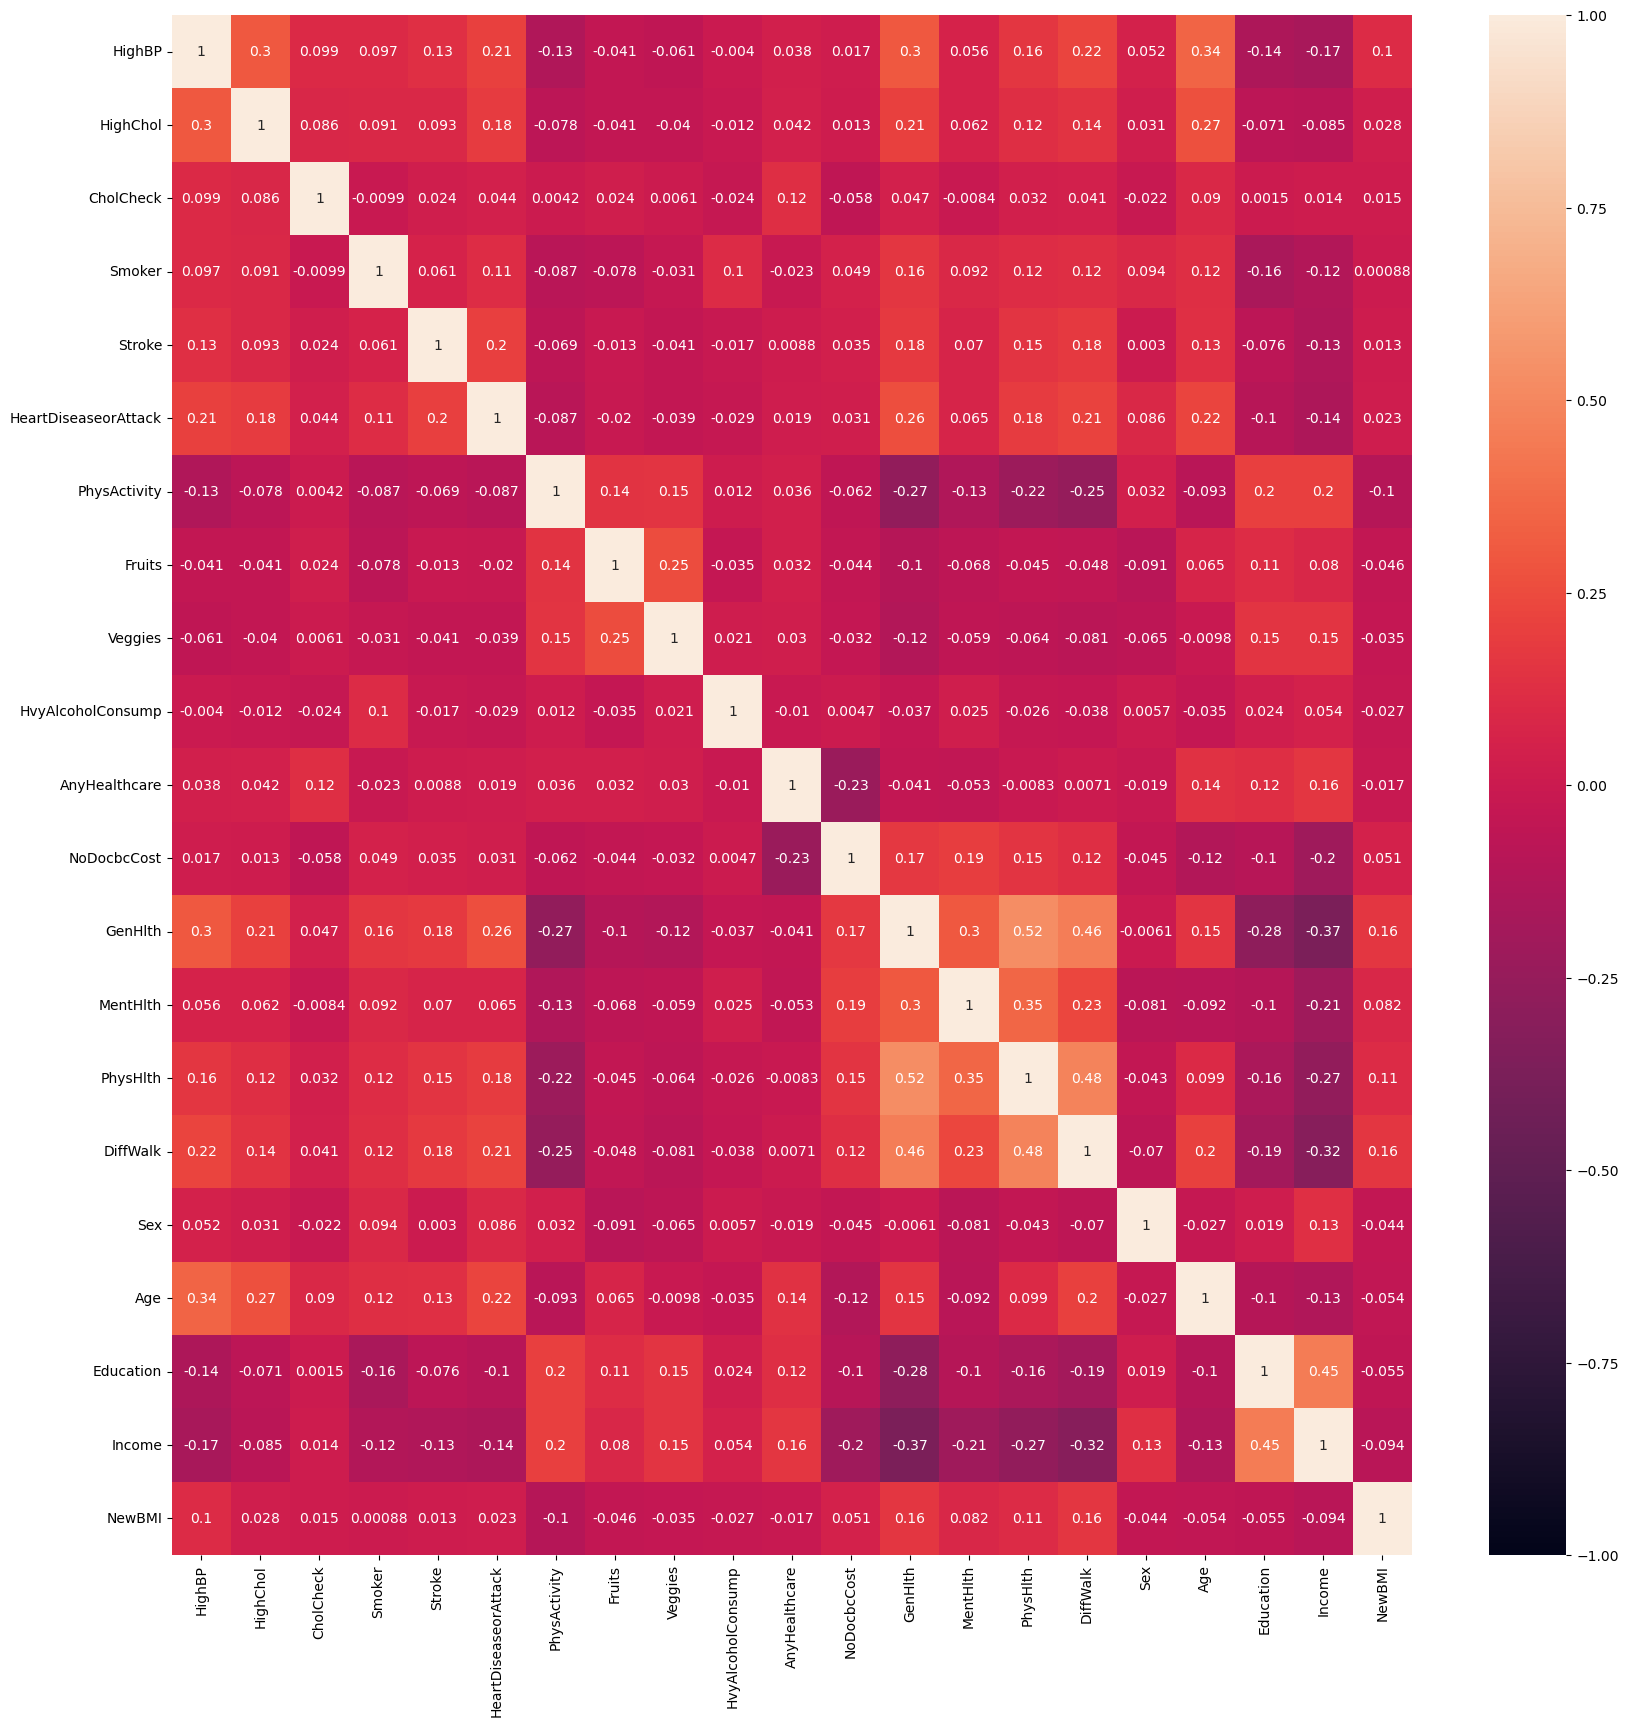

In [12]:
# Multivariate Analysis => relationships between two variables => correalation matrix
plt.figure(figsize=(20,20))
sns.heatmap(final_features.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# ANALYSIS #
# The correlation is 0.37 => the GenHealth and Income are negatively correlated with a strength of 37% how?
# The highest correaltion value is 0.52 => The is a 52% +ve correlation between GenHEalth and PhsyHlth
# This means that variables are not highly correlated => should we do dimensionality reduction? (I don't think so data could be lost)


### ***Handle Imbalanced Dataset***

In [ ]:
# Is it even allowed
X_resampled, y_resampled = imb.over_sampling.BorderlineSMOTE().fit_resample(final_features, labels)

print(len(final_features), len(labels))
print(len(X_resampled), len(y_resampled))

253680 253680
436668 436668


In [ ]:
# save resampled data as csv
resampled_dataset = pd.concat([X_resampled, y_resampled], axis=1)
resampled_dataset.to_csv("dataset/resampled_dataset.csv", index=False)

Data Distribution After SMOTE: 


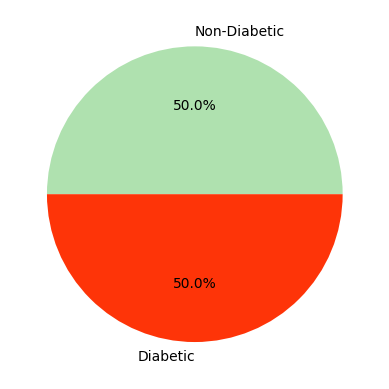

In [ ]:
print("Data Distribution After SMOTE: ")
plt.pie(np.array(y_resampled.value_counts()), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['#AFE1AF','#FE3408'])
plt.show()

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

#### Split Data to Train & Test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

##### Method 1: Logistic Regression Model

##### A-Simple Model

In [15]:
#################################################### Model Training ####################################################
#Build simple model. No parameter's Tuning
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

Training Accuracy: 0.8608088930936613
Testing Accuracy: 0.8625039419741406
Confusion Matrix: 
 [[42763   976]
 [ 6000   997]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     43739
           1       0.51      0.14      0.22      6997

    accuracy                           0.86     50736
   macro avg       0.69      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736



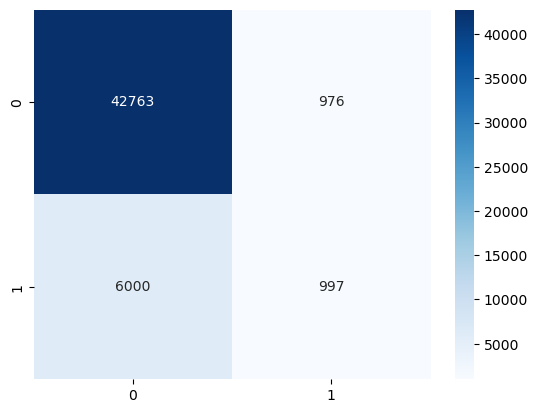

AUC: 0.810


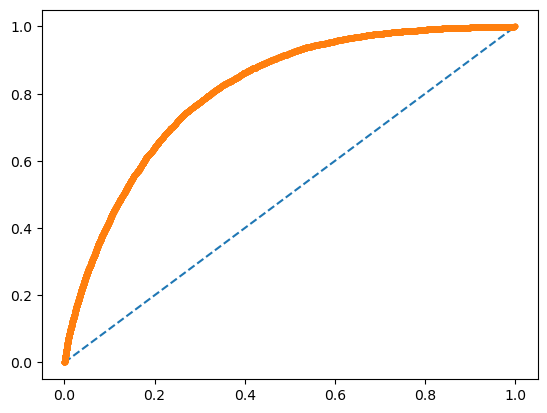

In [30]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#ROC-AUC Curve
# predict probabilities and keep postive outcomes only
probs = lr_model.predict_proba(X_test)
probs = probs[:, 1]

# AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()


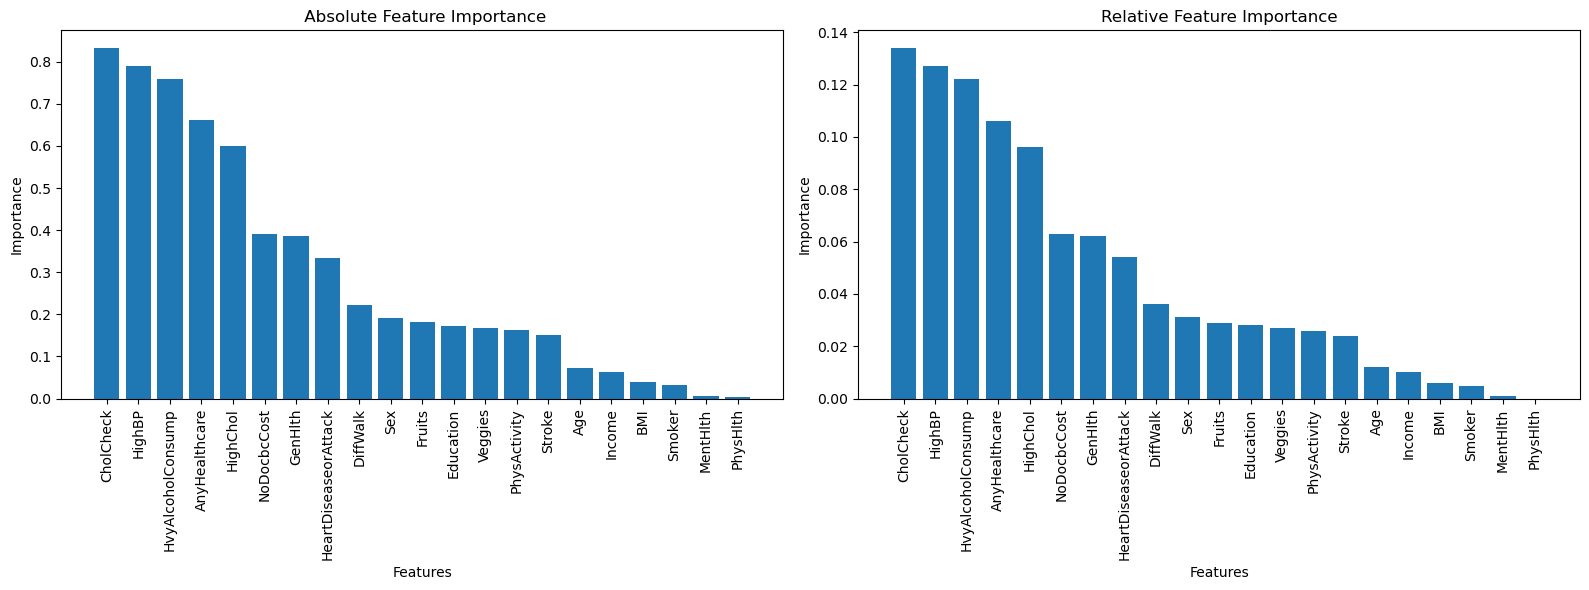

In [17]:
#################################################### Feature's Importance ####################################################
#1-Absolute Feature Importance
feature_importance = {}
for idx, feature_name in enumerate(features):
	importance = abs(lr_model.coef_[0][idx]).round(3)  # Get the absolute value of the coefficient
	feature_importance[feature_name] = importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importances
features_plot_x = list(sorted_feature_importance.keys())
importances_plot_y = list(sorted_feature_importance.values())

plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1) 
plt.bar(features_plot_x, importances_plot_y)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(' Absolute Feature Importance')

#2-Relative Feature Importance
# Calculate total importance
total_importance = sum(importances_plot_y)
relative_importances = [(importance / total_importance).round(3) for importance in importances_plot_y]

plt.subplot(1, 2, 2)
plt.bar(features_plot_x, relative_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Relative Feature Importance')

plt.tight_layout() 
plt.show()

# print("Feature Importance (Absolute): ", relative_importances)

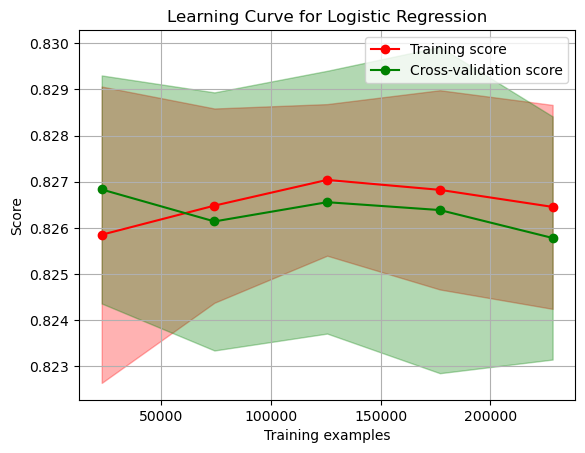

In [18]:
# Get the learning curve plot
train_sizes, train_scores, test_scores = learning_curve(lr_model, features, labels, cv=10,
                                                            train_sizes=np.linspace(.1, 1.0, 5),
                                                            scoring='f1_weighted', shuffle=True, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
					train_scores_mean + train_scores_std, alpha=0.3, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
					test_scores_mean + test_scores_std, alpha=0.3, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
			label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
			label="Cross-validation score")

plt.legend(loc='best')
plt.show()

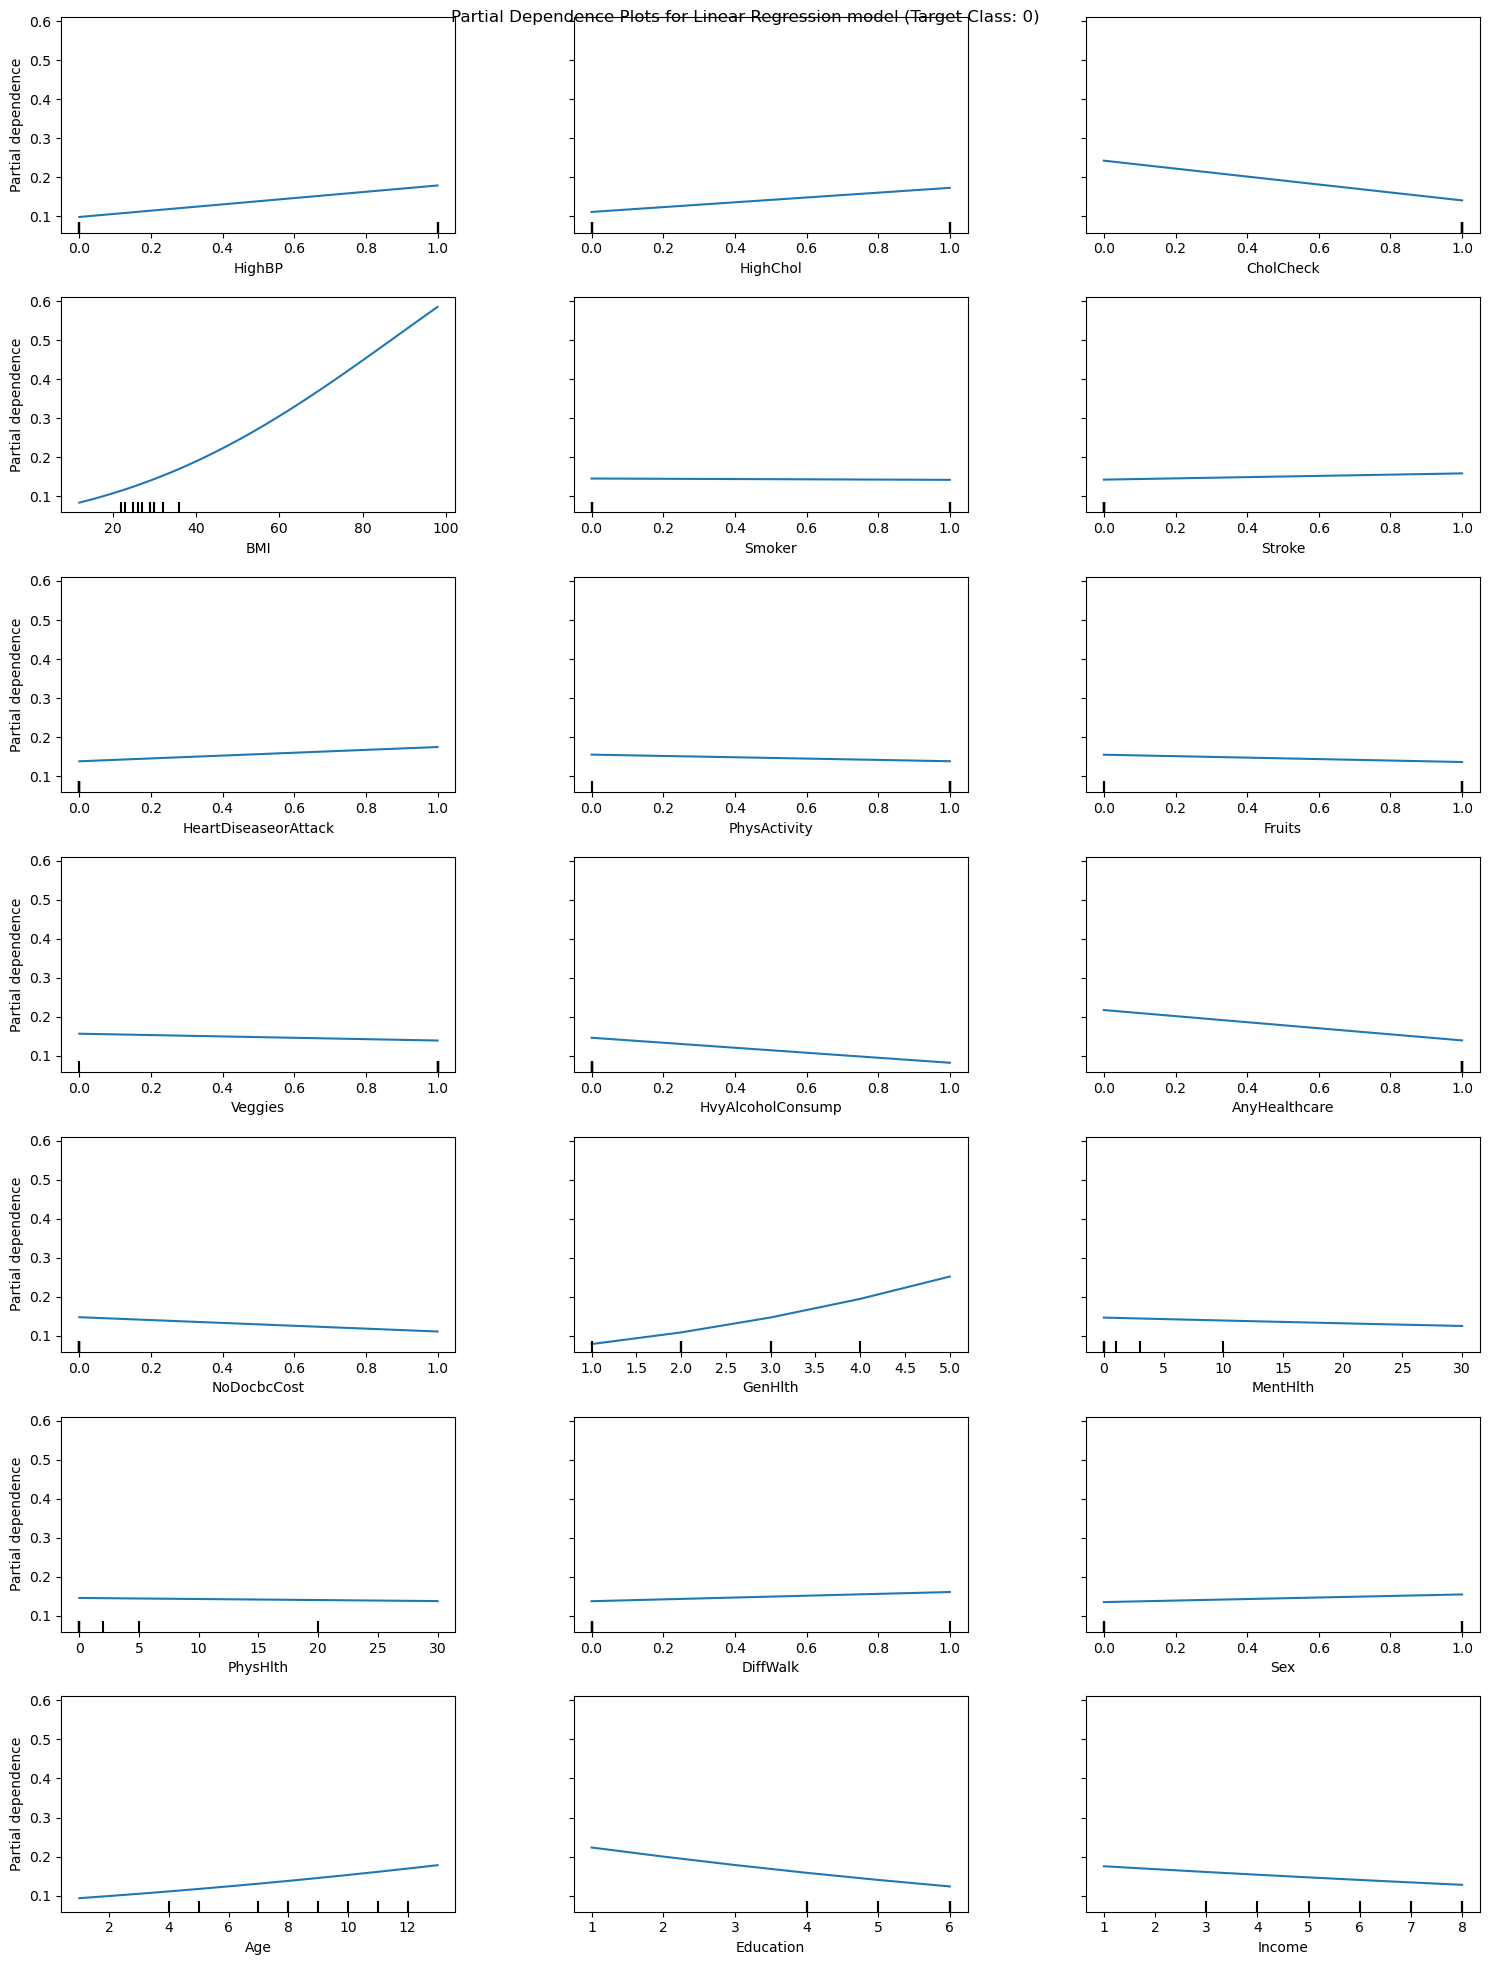

In [19]:
# Model's Features Dependencies
'''
This is to show the relationship between a feature and the model's predictions (with all other features constant)

'''
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(15, 20), )
target_class = 0  # specify the target class
PartialDependenceDisplay.from_estimator(
	lr_model, features, features.columns, ax=ax, target=target_class)

# Increase spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Partial Dependence Plots for Linear Regression model (Target Class: {target_class})')
fig.tight_layout()
plt.show()


##### B-Tuned Model

In [ ]:
#################################################### Hyper Parameter Tuning ####################################################
'''
penalty: Specifies the norm used in the penalization. It can be one of {'l1', 'l2', 'elasticnet', 'none'}. The default is 'l2'.
C: Inverse of regularization strength. Smaller values specify stronger regularization, which can help prevent overfitting.
solver: Algorithm to use in the optimization problem. It can be one of {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}. The default is 'lbfgs'. The choice of solver may depend on the size of the dataset and the regularization.
multi_class: Specifies the strategy to use for multiclass classification. It can be one of {'auto', 'ovr', 'multinomial'}. The default is 'auto'. 'ovr' stands for One-vs-Rest, and 'multinomial' stands for Multinomial Logistic Regression.
max_iter: Maximum number of iterations for the solver to converge. The default is 100.
dual: Dual or primal formulation. Dual formulation is only implemented for 'liblinear' solver when the number of samples is less than the number of features.
fit_intercept: Whether to fit the intercept term.
intercept_scaling: Useful only when the solver 'liblinear' is used and self.fit_intercept is set to True. It scales the intercept term.
class_weight: Weights associated with classes. This parameter is particularly useful for imbalanced datasets.
verbose: Controls the verbosity of the Logistic Regression algorithm.
random_state: Random seed used by the random number generator.
'''


##### Method 2: SVM

##### A-Simple Model

In [26]:
#################################################### Model Training ####################################################
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

Training Accuracy: 0.8577538631346578
Testing Accuracy: 0.8600993377483444
Confusion Matrix: 
 [[42994   745]
 [ 6353   644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     43739
           1       0.46      0.09      0.15      6997

    accuracy                           0.86     50736
   macro avg       0.67      0.54      0.54     50736
weighted avg       0.82      0.86      0.82     50736



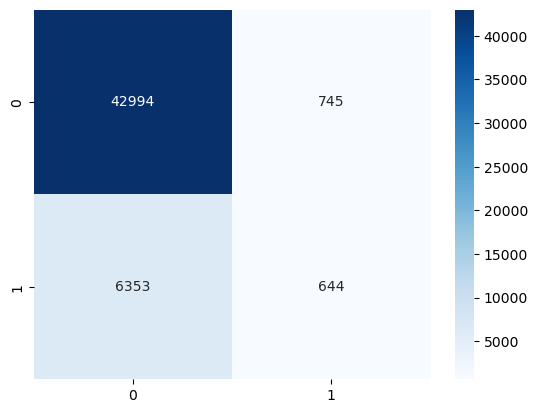

AUC: 0.815


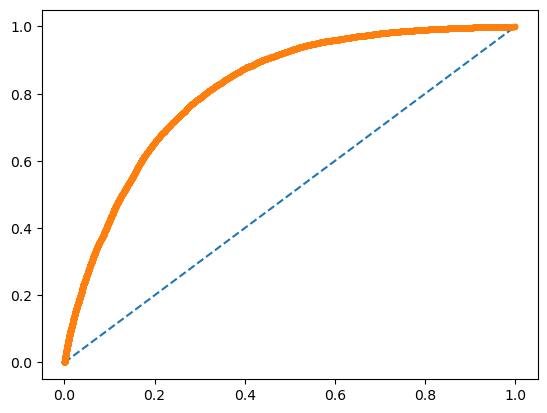

In [32]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#ROC-AUC Curve
# predict probabilities and keep postive outcomes only
# Calibrate the model by training on a validation set using cross-validation to get probability estimates by "sigmoid" (Platt scaling) or "isotonic regression".
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc = CalibratedClassifierCV(svm_model)  
calibrated_svc.fit(X_train, y_train)
probs = calibrated_svc.predict_proba(X_test)
probs = probs[:, 1]

# AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()


In [16]:
# svm = SVC(gamma='auto', kernel='linear', C=1.0, random_state=0)
# svm.fit(X_train, y_train)


SVC(gamma='auto', kernel='linear', random_state=0)

In [17]:
# #################################################### Model Evaluation ####################################################
# # Evaluate model
# train_accuracy = accuracy_score(y_train, svm.predict(X_train))
# test_accuracy = accuracy_score(y_test, svm.predict(X_test))

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8603112188584043
Testing Accuracy: 0.8620900346893724


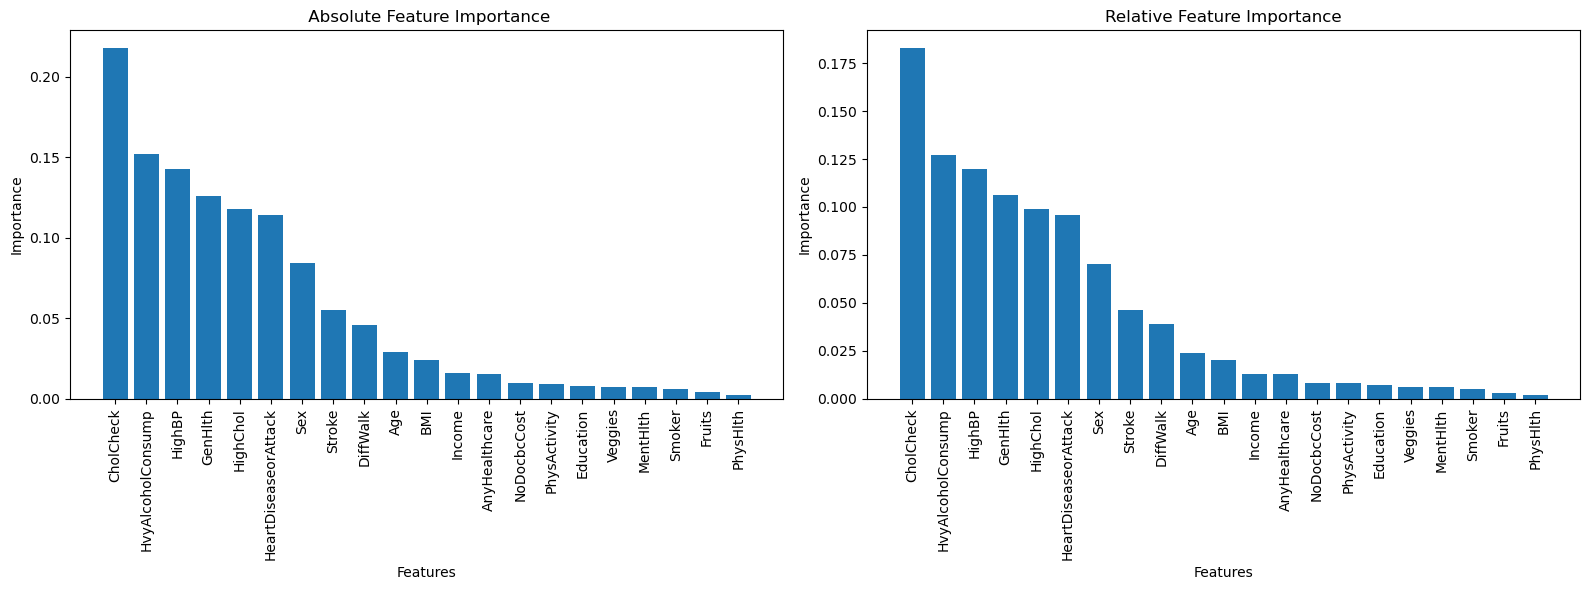

In [12]:
#################################################### Feature's Importance ####################################################
#1-Absolute Feature Importance
feature_importance = {}
for idx, feature_name in enumerate(features):
	importance = abs(svm_model.coef_[0][idx]).round(3)  # Get the absolute value of the coefficient
	feature_importance[feature_name] = importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importances
features_plot_x = list(sorted_feature_importance.keys())
importances_plot_y = list(sorted_feature_importance.values())

plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1) 
plt.bar(features_plot_x, importances_plot_y)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(' Absolute Feature Importance')

#2-Relative Feature Importance
# Calculate total importance
total_importance = sum(importances_plot_y)
relative_importances = [(importance / total_importance).round(3) for importance in importances_plot_y]

plt.subplot(1, 2, 2)
plt.bar(features_plot_x, relative_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Relative Feature Importance')

plt.tight_layout() 
plt.show()

# print("Feature Importance (Absolute): ", relative_importances)

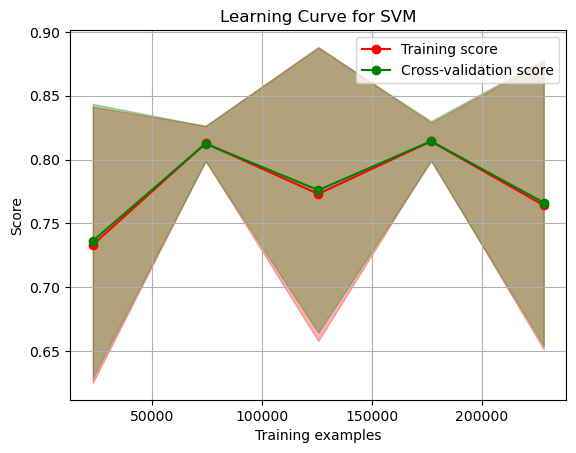

In [14]:
# Get the learning curve plot
train_sizes, train_scores, test_scores = learning_curve(svm_model, features, labels, cv=10,
                                                            train_sizes=np.linspace(.1, 1.0, 5),
                                                            scoring='f1_weighted', shuffle=True, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
					train_scores_mean + train_scores_std, alpha=0.3, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
					test_scores_mean + test_scores_std, alpha=0.3, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
			label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
			label="Cross-validation score")

plt.legend(loc='best')
plt.show()

In [39]:
# # Model's Features Dependencies
# '''
# This is to show the relationship between a feature and the model's predictions (with all other features constant)

# '''
# from sklearn.inspection import PartialDependenceDisplay
# fig, ax = plt.subplots(figsize=(15, 20), )
# target_class = 0  # specify the target class
# PartialDependenceDisplay.from_estimator(
# 	svm_model, features, features.columns, ax=ax, target=target_class)

# # Increase spacing between subplots
# fig.subplots_adjust(wspace=0.3, hspace=0.3)
# fig.suptitle(f'Partial Dependence Plots for SVM (Target Class: {target_class})')
# fig.tight_layout()
# plt.show()


##### B-Tuned Model

In [ ]:
#################################################### Hyper Parameter Tuning ####################################################
'''
C: Regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error. Higher values of C lead to a smaller margin and potentially more misclassifications on the training data.
kernel: Specifies the kernel type to be used in the algorithm. It can be one of {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}. The default is 'rbf' (Radial Basis Function).
degree: Degree of the polynomial kernel function ('poly'). This parameter is ignored for other kernel types.
gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. Higher values of gamma lead to tighter decision boundaries, potentially resulting in overfitting.
coef0: Independent term in the polynomial and sigmoid kernels. It is only significant in 'poly' and 'sigmoid' kernels.
shrinking: Whether to use the shrinking heuristic. Shrinking helps speed up the optimization process, especially for large datasets. It's enabled by default.
probability: Whether to enable probability estimates. This allows the predict_proba method to be used, but it adds computational overhead. Disabled by default.
tol: Tolerance for stopping criterion.
cache_size: Size of the kernel cache in MB.
class_weight: Weights associated with classes. This parameter is particularly useful for imbalanced datasets.
verbose: Controls the verbosity of the SVC algorithm.
max_iter: Maximum number of iterations for the solver to converge. The default is -1, which means no limit.
'''

### Random Forest & Decision Trees
 Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. 

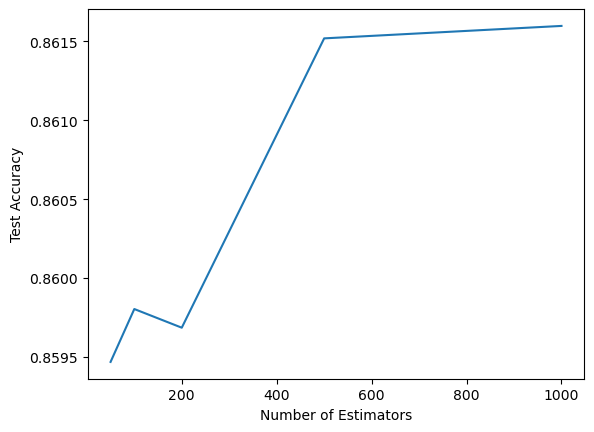

Test Accuracies [0.8594686218858404, 0.8598036896877956, 0.8596854304635762, 0.8615184484389783, 0.8615972879217912]


In [36]:
# try different number of estimators
n_estimators_options = [50, 100, 200, 500, 1000] 
test_accuracies = [] # the accuracy of the final model for each number of estimator

# loop on all the different options for the number of estimators
# the default base classifier is the decision tree
for n_estimators in n_estimators_options:

    # create the adaboost classifies with the current number of estimators
    rf_model = RandomForestClassifier(n_estimators=n_estimators)

    # fit the rf_model => training
    rf_model.fit(X_train, y_train)

    # calculate the accuracy of the rf_model on the test set
    test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
    test_accuracies.append(test_accuracy)

# plot the test accuracies for each number of estimators
plt.plot(n_estimators_options, test_accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.show()

print("Test Accuracies" ,test_accuracies)


Train Accuracy:  0.9943679044465469
Test Accuracy:  0.8614790286975718
Confusion Matrix: 
 [[42504  1235]
 [ 5793  1204]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.49      0.17      0.26      6997

    accuracy                           0.86     50736
   macro avg       0.69      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



<Axes: >

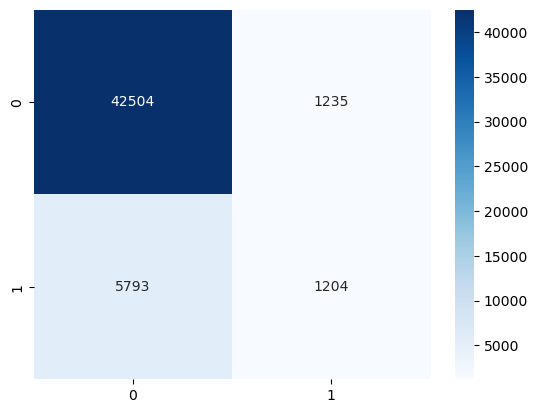

In [38]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier on your training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [40]:
# Make predictions on the test data
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

KeyboardInterrupt: 

### ***Method 3: Adaboost Classifier***

Generally, decision tree-based algorithms perform well on imbalanced datasets. Similarly bagging and boosting based techniques are good choices for imbalanced classification problems.

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

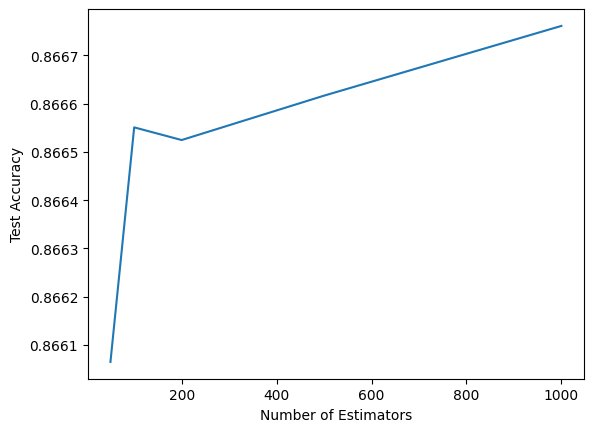

In [ ]:
# Machine Learning Method 3: Adaboost Classifier

n_estimators_options = [50, 100, 200, 500, 1000] # try different number of estimators

test_accuracies = [] # the accuracy of the final model for each number of estimator

# loop on all the different options for the number of estimators
# the default base classifier is the decision tree
for n_estimators in n_estimators_options:

    # create the adaboost classifies with the current number of estimators
    model = AdaBoostClassifier(n_estimators=n_estimators)

    # fit the model => training
    model.fit(X_train, Y_train)

    # calculate the accuracy of the model on the test set
    test_accuracy = accuracy_score(Y_test, model.predict(X_test))
    test_accuracies.append(test_accuracy)

# plot the test accuracies for each number of estimators
plt.plot(n_estimators_options, test_accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
print("Test Accuracies" ,test_accuracies)
# Note: The accuracies are not very different for different number of estimators

Test Accuracies [0.8660648586145275, 0.8665510354252076, 0.8665247555976032, 0.8666167349942184, 0.8667612740460423]


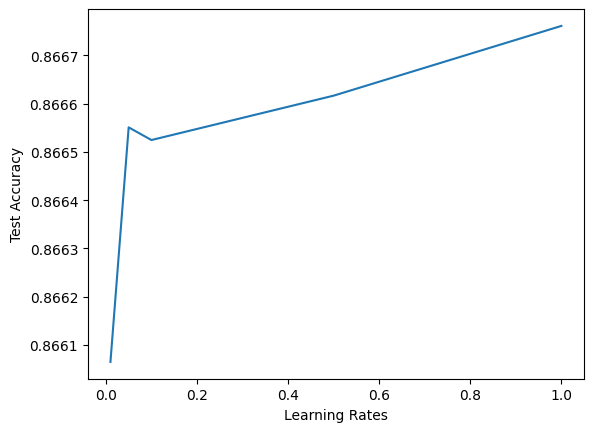

Test Accuracies [0.8660648586145275, 0.8665510354252076, 0.8665247555976032, 0.8666167349942184, 0.8667612740460423]


In [ ]:
# Try differen learning rates
n_estimators = 100 # use 100 estimators
learning_rate_options = [0.01, 0.05, 0.1, 0.5, 1] # try different learning rates => how much each model contributes to the final prediction 

test_accuracies_lr = []

for learning_rate in learning_rate_options:
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, Y_train)
    test_accuracy = accuracy_score(Y_test, model.predict(X_test))
    test_accuracies_lr.append(test_accuracy)


# plot the test accuracies for each number of estimators
plt.plot(learning_rate_options, test_accuracies)
plt.xlabel('Learning Rates')
plt.ylabel('Test Accuracy')
plt.show()

print("Test Accuracies" ,test_accuracies)

In [ ]:
# split the original dataset 
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

Train Accuracy:  0.8629375591296121
Test Accuracy:  0.8639230526647745
Confusion Matrix: 
 [[64188  1417]
 [ 8939  1560]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



<Axes: >

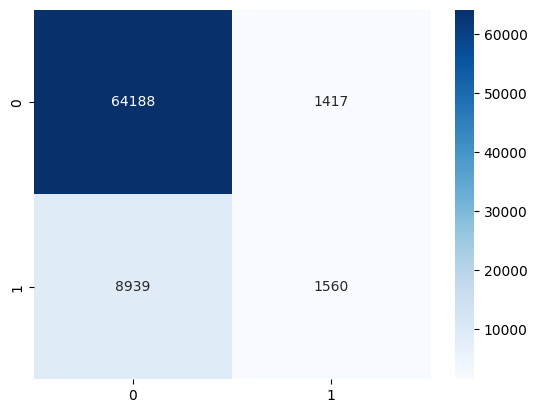

In [ ]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(X_train, Y_train)

# Evaluate model
Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_predicted_train)
test_accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# plot the features importance
# feature_importance = model.feature_importances_
# plot_feature_importance(feature_importance)

#### Coments on the result:
It is clear that the problem is that the data is imbalanced and the accuracy metrics for the minority class (0) is affecting the total accuracy and f1 score of the model
=> Revisit data preprocessing <br> <br>

Without any data altering: <br>
Train Accuracy:  0.8629375591296121 <br> 
Test Accuracy:  0.8639230526647745 <br> <br>
Confusion Matrix: <br> 
 [[64188  1417] <br>
 [ 8939  1560]] <br> <br>
Classification Report: <br>
               precision    recall  f1-score   support <br>

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104 <br>
weighted avg       0.83      0.86      0.83     76104 <br>

Comments: <br>
The recall of class 1 (diabetic - true positives) is very low which, in our case, is a problem since this means that it fails to correctly diagnose if a person is diabetic (hayah aw moot)
The precision is also relitavely low and consequently the f1 score <br>

To compensate this imbalance: <br>

1. First we try a over sampling technique called SMOTE (Synthetic Minority Over-Sampling Technique) which synthesizes new data for the minority class that based on the current data points. It finds tqo points from the minority class, and constructs new datapoints that are classified as diabetic until the dataset becomes balanced.


In [ ]:
# split the sampled dataset with SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Train Accuracy:  0.7445880647894604
Test Accuracy:  0.7463530812741888
Confusion Matrix: 
 [[46647 18947]
 [14281 51126]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.75    131001
weighted avg       0.75      0.75      0.75    131001



<Axes: >

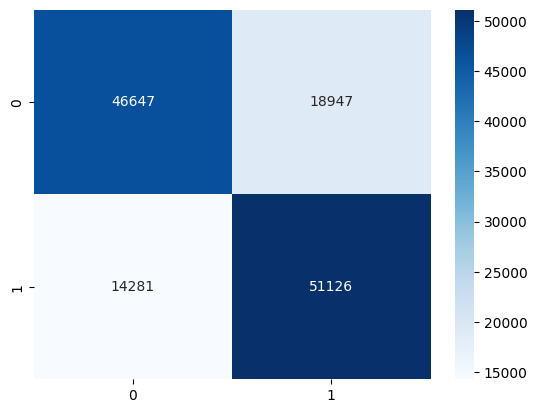

In [ ]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(X_train, Y_train)

# Evaluate model
Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_predicted_train)
test_accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Handling Imbalanced Data: <br>
1. Applying SMOTE (Synthetic Minority Over-Sampling Technique): <br>
Results: <br>
Train Accuracy:  0.7445880647894604 <br>
Test Accuracy:  0.7463530812741888 <br> <br>
Confusion Matrix: <br>
 [[46647 18947] <br>
 [14281 51126]] <br> <br>
Classification Report: <br>
               precision    recall  f1-score   support <br>

           0       0.77      0.71      0.74     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.75    131001 <br>
   macro avg       0.75      0.75      0.75    131001 <br>
weighted avg       0.75      0.75      0.75    131001 <br>

The recall, precision and f1 score for class 1 (diabetic) increased significantly on the other hand, the recall precision and f1 score of class 0 (non-diabetic decreased slightly) and the overall accuracy decreased by 10%. Over-Sampling also increases the chance of overfitting since it replicates minority class events.

In this case this could be a good thing since falsely diagnosing a non diabetic person is less severe than falsely diagnosing a diabetic person, however we will try to increase both by adjusting the loss function.
2. Adjusting the loss function to give more weight to missclassified smaples. The question is should this be done for the resampled or original data? استنونا في الحلقة القادمة

#### **Custom AdaBoost**

In [ ]:
# Using the custom AdaBoost to adjust the weights of the samples (loss function)
# Give even more weight to the samples that are misclassified
# trying with the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

In [ ]:
# trying our own adaboost classifier => from lab
n_estimators = 100
weight_multipliers = [1.1, 1.25, 1.5, 2, 3]

train_accuracies = []
test_accuracies = []
predicted_tests = []

for weight_multiplier in weight_multipliers:
    train_accuracy, test_accuracy, predicted_train, predicted_test = get_scores(n_estimators, X_train, Y_train, X_test, Y_test, weight_multiplier)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    predicted_tests.append(predicted_test)

Train Accuracy:  0.8616873901878632
Test Accuracy:  0.8632134973194576
Confusion Matrix: 
 [[64021  1584]
 [ 8826  1673]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     65605
           1       0.51      0.16      0.24     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.57      0.58     76104
weighted avg       0.83      0.86      0.83     76104



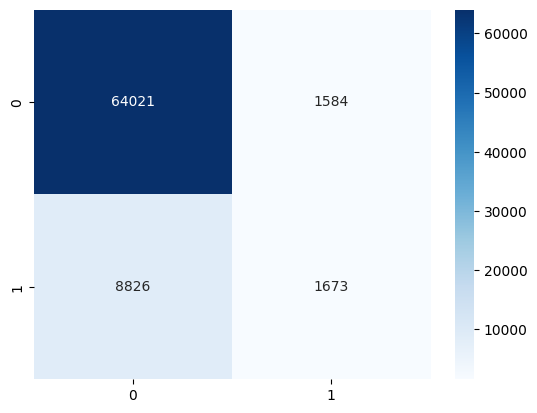

Train Accuracy:  0.8625996756318421
Test Accuracy:  0.8640018921475875
Confusion Matrix: 
 [[64310  1295]
 [ 9055  1444]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.53      0.14      0.22     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.57     76104
weighted avg       0.83      0.86      0.83     76104



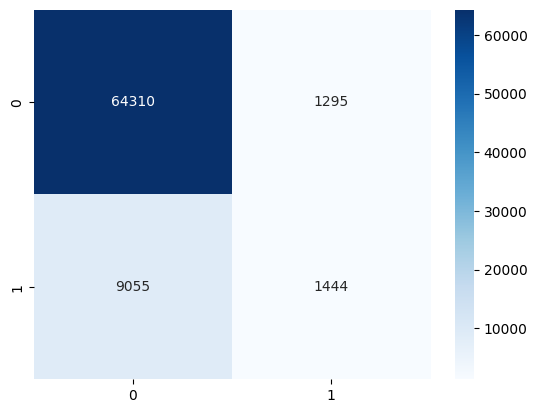

Train Accuracy:  0.8624082083164392
Test Accuracy:  0.863883632923368
Confusion Matrix: 
 [[64196  1409]
 [ 8950  1549]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



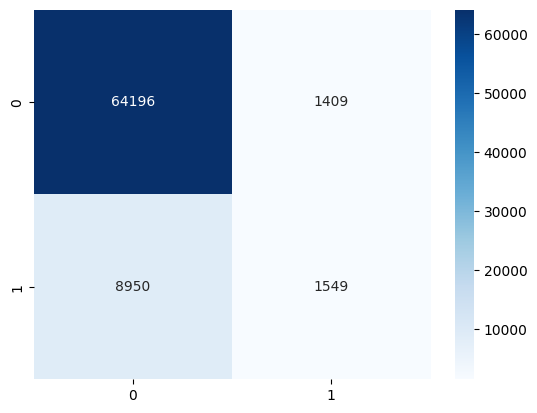

Train Accuracy:  0.8628305626886517
Test Accuracy:  0.8636602543887312
Confusion Matrix: 
 [[64212  1393]
 [ 8983  1516]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.14      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



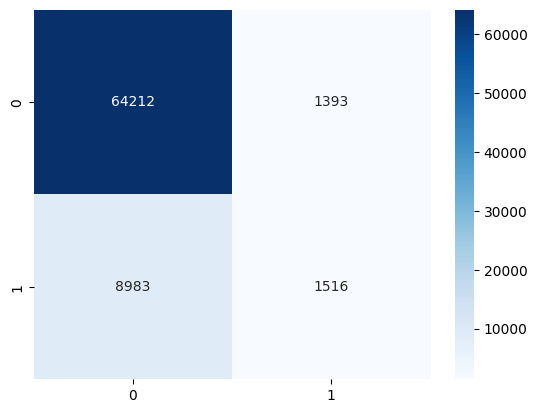

Train Accuracy:  0.8600768121818264
Test Accuracy:  0.8620440449910649
Confusion Matrix: 
 [[65605     0]
 [10499     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     65605
           1       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104



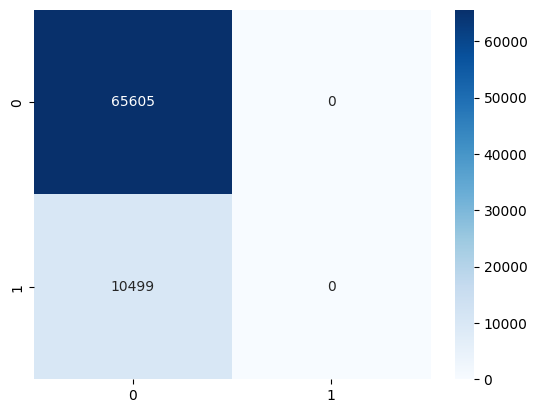

In [ ]:
for train_accuracy, test_accuracy, predicted_test in zip(train_accuracies, test_accuracies, predicted_tests):
    
    conf_matrix = confusion_matrix(Y_test, predicted_test)
    class_report = classification_report(Y_test, predicted_test)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

Increasing the weights => f1 score of the positive class = 0 ? => ***MULT***

In [ ]:
# trying on the resampled dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from custom_adaboost import * 
# trying our own adaboost classifier => from lab
n_estimators = 100
weight_multipliers = [1.1, 1.25, 1.5, 2, 2.5]

train_accuracies = []
test_accuracies = []
predicted_tests = []

for weight_multiplier in weight_multipliers:
    train_accuracy, test_accuracy, predicted_train, predicted_test = get_scores(n_estimators, X_train, Y_train, X_test, Y_test, weight_multiplier)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    predicted_tests.append(predicted_test)

Train Accuracy:  0.7406131509125944
Test Accuracy:  0.740376027663911
Confusion Matrix: 
 [[46747 18847]
 [15164 50243]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     65594
           1       0.73      0.77      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



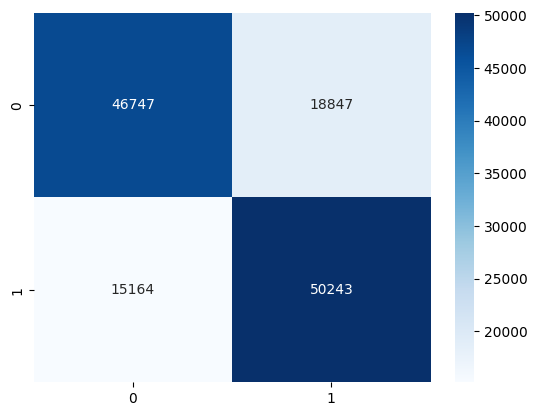

Train Accuracy:  0.7420624404989744
Test Accuracy:  0.742208074747521
Confusion Matrix: 
 [[46347 19247]
 [14524 50883]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



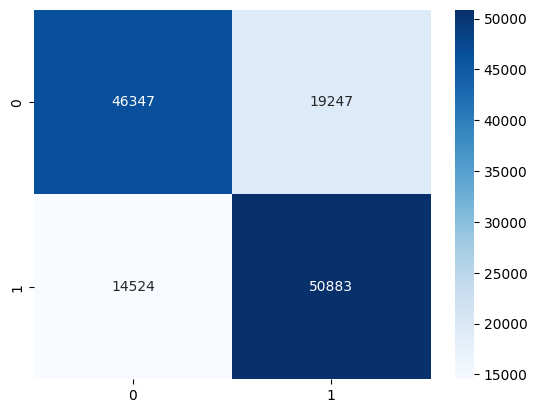

Train Accuracy:  0.7416502272080401
Test Accuracy:  0.7413378523828063
Confusion Matrix: 
 [[47141 18453]
 [15432 49975]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.74     65594
           1       0.73      0.76      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



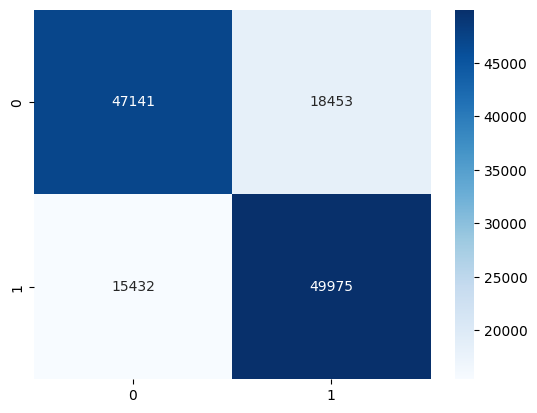

Train Accuracy:  0.7448792313203584
Test Accuracy:  0.7444523324249434
Confusion Matrix: 
 [[46189 19405]
 [14072 51335]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.75      0.74      0.74    131001
weighted avg       0.75      0.74      0.74    131001



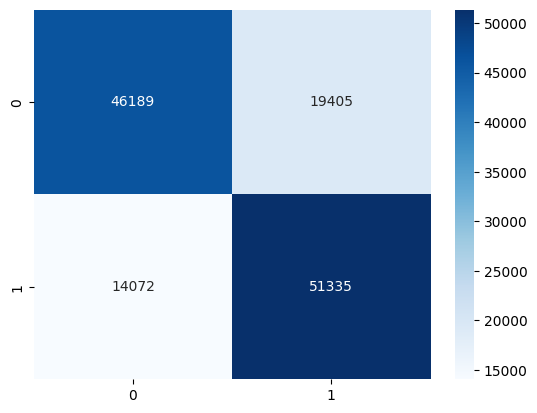

Train Accuracy:  0.745710200970337
Test Accuracy:  0.7454065236143236
Confusion Matrix: 
 [[46179 19415]
 [13937 51470]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73     65594
           1       0.73      0.79      0.76     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.74    131001
weighted avg       0.75      0.75      0.74    131001



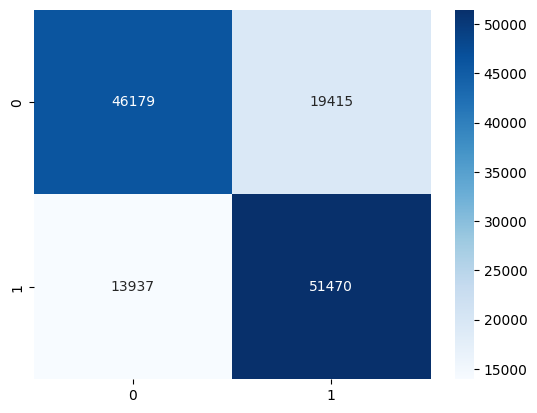

In [ ]:
for train_accuracy, test_accuracy, predicted_test in zip(train_accuracies, test_accuracies, predicted_tests):
    
    conf_matrix = confusion_matrix(Y_test, predicted_test)
    class_report = classification_report(Y_test, predicted_test)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

Both sklearn and own implementation of the classifier provide almost the same accuracies
We can try the adaboost classifier with a stronger classifier than the DecisionTreeClassifier


### AdaBoost With SVM as a base classifier

In [ ]:
# split the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(final_features, labels, test_size=0.3, random_state=42)

# Try the adaboost classifier with SVM model as the base classifier
adaboost_svm = AdaBoostClassifier(base_estimator=SVC(class_weight='balanced', probability=True), n_estimators=50, learning_rate=1)

# train model
adaboost_svm.fit(X_train, Y_train)

# Predict
Y_predicted_train = adaboost_svm.predict(X_train)
Y_predicted_test = adaboost_svm.predict(X_test)

In [ ]:
# Evaluate model
train_accuracy = accuracy_score(Y_train, Y_predicted_train)
test_accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

conf_matrix = confusion_matrix(Y_test, predicted_test)
class_report = classification_report(Y_test, predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)
# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()